In [12]:
!pip install nltk scikit-learn pandas matplotlib


In [13]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import seaborn as sns

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


📌 Dataset Sample:
                                              review label
0  [plot, :, two, teen, couples, go, to, a, churc...   neg
1  [the, happy, bastard, ', s, quick, movie, revi...   neg
2  [it, is, movies, like, these, that, make, a, j...   neg
3  [", quest, for, camelot, ", is, warner, bros, ...   neg
4  [synopsis, :, a, mentally, unstable, man, unde...   neg

📌 Dataset Shape: (2000, 2)
📌 Label Distribution:
label
neg    1000
pos    1000
Name: count, dtype: int64


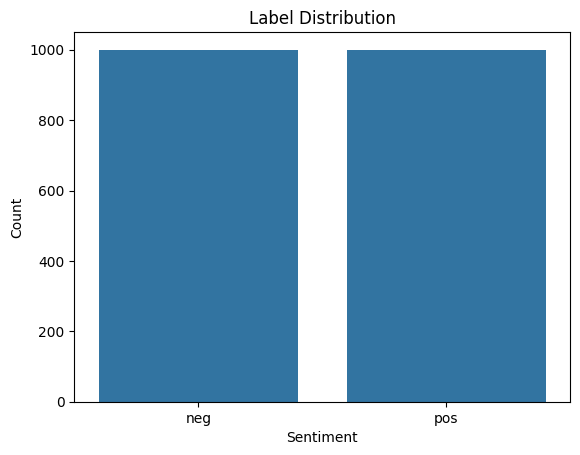

In [14]:
# Load the dataset from NLTK's movie reviews
from nltk.corpus import movie_reviews

# Create a DataFrame from the NLTK dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(documents, columns=["review", "label"])

# Check the first few rows of the dataset
print(f"📌 Dataset Sample:\n{df.head()}")
print(f"\n📌 Dataset Shape: {df.shape}")
print(f"📌 Label Distribution:\n{df['label'].value_counts()}")

# Plot label distribution
sns.countplot(data=df, x="label")
plt.title("Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [15]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize the text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing to the reviews
df["cleaned_review"] = df["review"].apply(lambda review: preprocess_text(" ".join(review)))

# Display a sample cleaned review
print(f"📌 Sample Cleaned Review:\n{df['cleaned_review'][0][:300]}...")  # Show first 300 characters


📌 Sample Cleaned Review:
plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares deal watch movie sorta find critique mind fuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt b...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Transform the cleaned reviews into TF-IDF features
X = tfidf_vectorizer.fit_transform(df["cleaned_review"]).toarray()
y = df["label"].apply(lambda label: 1 if label == "pos" else 0)  # Convert labels to binary (1: positive, 0: negative)

# Print the shape of the TF-IDF matrix
print(f"📌 TF-IDF Feature Matrix Shape: {X.shape}")
print(f"📌 First 5 TF-IDF Features: {tfidf_vectorizer.get_feature_names_out()[:5]}")


📌 TF-IDF Feature Matrix Shape: (2000, 5000)
📌 First 5 TF-IDF Features: ['000' '10' '100' '11' '12']


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"📌 Training Set Shape: {X_train.shape}")
print(f"📌 Testing Set Shape: {X_test.shape}")


📌 Training Set Shape: (1600, 5000)
📌 Testing Set Shape: (400, 5000)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Adjusted pos_label to 1
recall = recall_score(y_test, y_pred, pos_label=1)        # Adjusted pos_label to 1

# Display the results
print(f"📌 Accuracy: {accuracy:.2f}")
print(f"📌 Precision (Positive): {precision:.2f}")
print(f"📌 Recall (Positive): {recall:.2f}")

# Detailed Classification Report
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


📌 Accuracy: 0.82
📌 Precision (Positive): 0.83
📌 Recall (Positive): 0.83

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82       199
    Positive       0.83      0.83      0.83       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



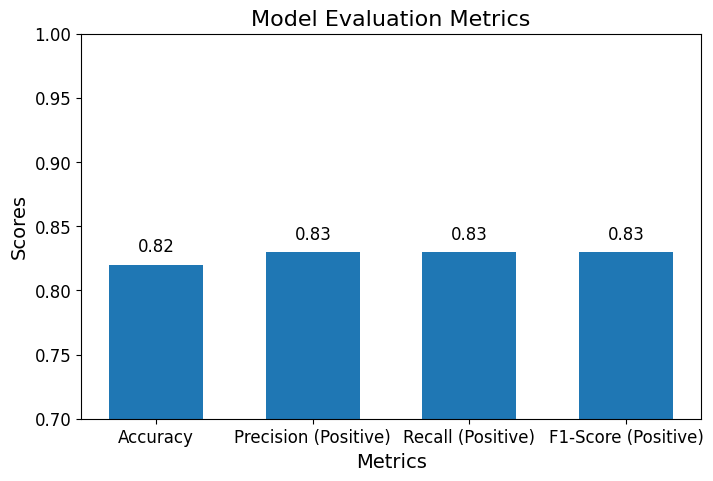

In [20]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision (Positive)', 'Recall (Positive)', 'F1-Score (Positive)']
values = [0.82, 0.83, 0.83, 0.83]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, width=0.6)
plt.ylim(0.7, 1.0)
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Scores", fontsize=14)
plt.xlabel("Metrics", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.show()
